In [1]:
import os
import pandas as pd
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PROJECT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(PROJECT_DIR, 'data')

### Download data if not exist

In [3]:
!cd .. && cd data && if not exist "synthetic-transaction-monitoring-dataset-aml.zip" kaggle datasets download berkanoztas/synthetic-transaction-monitoring-dataset-aml

In [4]:
AML_ZIP = os.path.join(DATA_DIR, "synthetic-transaction-monitoring-dataset-aml.zip")

file_names = []
# Open the ZIP file in read mode
with zipfile.ZipFile(AML_ZIP, 'r') as zip_ref:
    for name in zip_ref.namelist():
        file_names.append(name)
        
    # Extract all files to the current directory (optional)
    zip_ref.extractall(
      path=DATA_DIR
    )

print("ZIP file extracted successfully!")


ZIP file extracted successfully!


### Data Loading

In [5]:
AML_DATA = [os.path.join(DATA_DIR, file) for file in file_names]
print(AML_DATA)

['C:\\Users\\isaac\\Desktop\\GitHub\\Anti-Money-Laundering\\data\\SAML-D.csv']


In [6]:
df = pd.read_csv(AML_DATA[0])
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


### Data info from datasets

Features of the SAML-D dataset:

• Time and Date: Essential for tracking transaction chronology.

• Sender and Receiver Account Details: Helps uncover behavioural patterns and complex banking connections.

• Amount: Indicates transaction values to identify suspicious activities.

• Payment Type: Includes various methods like credit card, debit card, cash, ACH transfers, cross-border, and cheque.

• Sender and Receiver Bank Location: Pinpoints high-risk regions including Mexico, Turkey, Morocco, and the UAE.

• Payment and Receiver Currency: Align with location features, adding complexity when mismatched.

• 'Is Suspicious' Feature: Binary indicator differentiating normal from suspicious transactions.

• Type: Classifies typologies, offering deeper insights.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sender_account,9504852.0,5.006619e+09,2.885814e+09,9018.00,2.513133e+09,5.001017e+09,7.505051e+09,9.999987e+09
Receiver_account,9504852.0,5.006006e+09,2.884763e+09,9018.00,2.513219e+09,5.002572e+09,7.502397e+09,9.999971e+09
Amount,9504852.0,8.762968e+03,2.561495e+04,3.73,2.143688e+03,6.113720e+03,1.045846e+04,1.261850e+07
Is_laundering,9504852.0,1.038733e-03,3.221263e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [8]:
# check if data imbalanced
df['Is_laundering'].value_counts()

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64

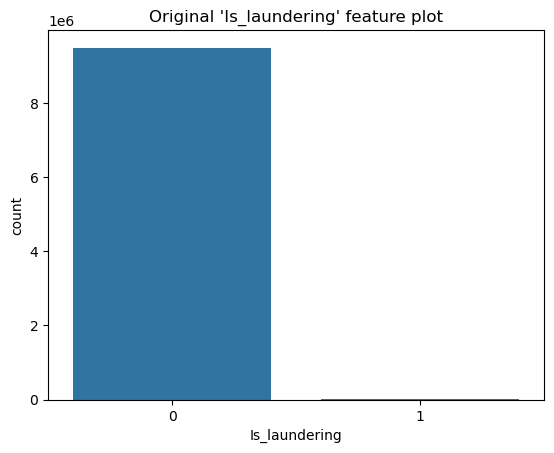

In [9]:
plt.title("Original 'Is_laundering' feature plot")
sns.countplot(df, x='Is_laundering')
plt.show()

### Under Sampling

In [10]:
# Shuffle the data
under_sampling = df.sample(frac=1, random_state=0)

In [11]:
is_laundering = under_sampling[under_sampling['Is_laundering']==1]
is_laundering

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
5034983,13:18:45,2023-03-25,2346864590,654742739,7765.830000,UK pounds,Mexican Peso,UK,Mexico,Cross-border,1,Deposit-Send
2693943,12:13:17,2023-01-07,8410229589,751634423,4433.810000,UK pounds,UK pounds,UK,UK,Credit card,1,Stacked Bipartite
5804409,07:41:55,2023-04-20,4415064236,6985374793,2258.370000,UK pounds,UK pounds,UK,UK,Cheque,1,Structuring
6544839,08:04:52,2023-05-15,9634559331,8020264563,2398.050000,UK pounds,UK pounds,UK,UK,Cash Deposit,1,Smurfing
6554124,13:37:16,2023-05-15,1941395567,6749916732,203.920000,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...
5746945,10:22:50,2023-04-18,9401291265,1614632149,9849.140000,UK pounds,Euro,UK,Spain,Cross-border,1,Layered_Fan_In
7978223,08:25:46,2023-07-02,3177801471,3062645467,107.630000,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal
3708083,22:42:06,2023-02-09,5626037357,381447918,16078.988929,UK pounds,UK pounds,UK,UK,Debit card,1,Cycle
1904137,12:13:16,2022-12-11,7263384547,5794331781,4486.160000,UK pounds,Pakistani rupee,UK,Pakistan,Cross-border,1,Deposit-Send


In [12]:
not_laundering = under_sampling[under_sampling['Is_laundering']==0][:is_laundering.shape[0]]
not_laundering

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
6540180,23:08:04,2023-05-14,6592431706,3176135265,7539.40,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_In
8325892,23:08:57,2023-07-13,875199802,5131320328,3978.22,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Periodical
3375496,16:48:13,2023-01-30,2881514469,7686941588,14662.18,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_Out
1047164,08:32:05,2022-11-12,5325849262,2709057217,13187.83,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
3288201,16:46:19,2023-01-27,7781169224,1702167255,2654.92,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out
...,...,...,...,...,...,...,...,...,...,...,...,...
7539995,17:27:26,2023-06-17,9238067867,6026528253,12390.70,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out
4608360,19:41:20,2023-03-10,984410648,2143937087,5669.93,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_In
5154687,15:22:52,2023-03-29,3091598957,2053117070,910.09,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
7308837,22:31:44,2023-06-09,5394960277,7433993790,12750.79,UK pounds,Euro,UK,Netherlands,Cross-border,0,Normal_Small_Fan_Out


In [13]:
df_us = pd.concat([is_laundering, not_laundering]).reset_index()
df_us

,index,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,5034983,13:18:45,2023-03-25,2346864590,654742739,7765.83,UK pounds,Mexican Peso,UK,Mexico,Cross-border,1,Deposit-Send
1,2693943,12:13:17,2023-01-07,8410229589,751634423,4433.81,UK pounds,UK pounds,UK,UK,Credit card,1,Stacked Bipartite
2,5804409,07:41:55,2023-04-20,4415064236,6985374793,2258.37,UK pounds,UK pounds,UK,UK,Cheque,1,Structuring
3,6544839,08:04:52,2023-05-15,9634559331,8020264563,2398.05,UK pounds,UK pounds,UK,UK,Cash Deposit,1,Smurfing
4,6554124,13:37:16,2023-05-15,1941395567,6749916732,203.92,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19741,7539995,17:27:26,2023-06-17,9238067867,6026528253,12390.70,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out
19742,4608360,19:41:20,2023-03-10,984410648,2143937087,5669.93,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_In
19743,5154687,15:22:52,2023-03-29,3091598957,2053117070,910.09,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
19744,7308837,22:31:44,2023-06-09,5394960277,7433993790,12750.79,UK pounds,Euro,UK,Netherlands,Cross-border,0,Normal_Small_Fan_Out


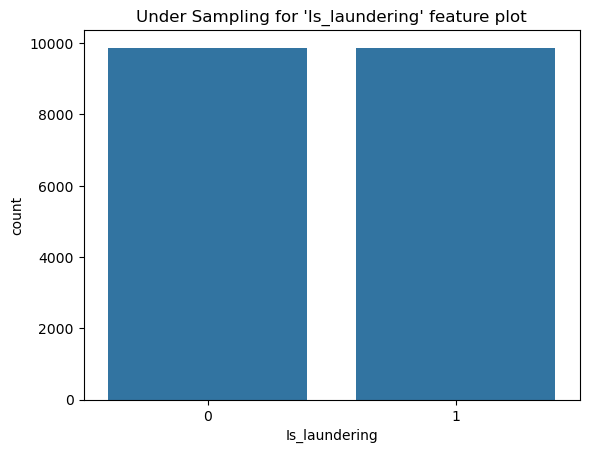

In [14]:
plt.title("Under Sampling for 'Is_laundering' feature plot")
sns.countplot(df_us, x='Is_laundering')
plt.show()

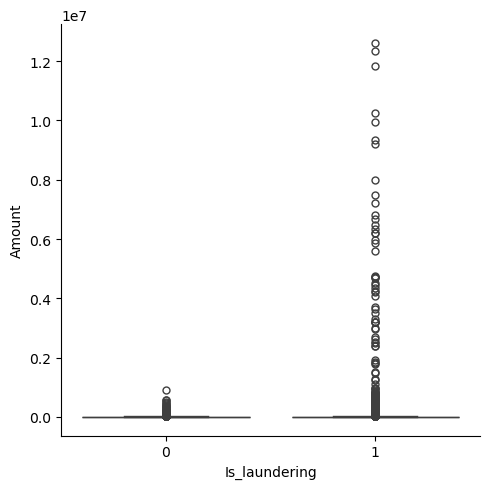

In [15]:
sns.catplot(
    data=df_us,
    x="Is_laundering", y="Amount", kind="box",
)

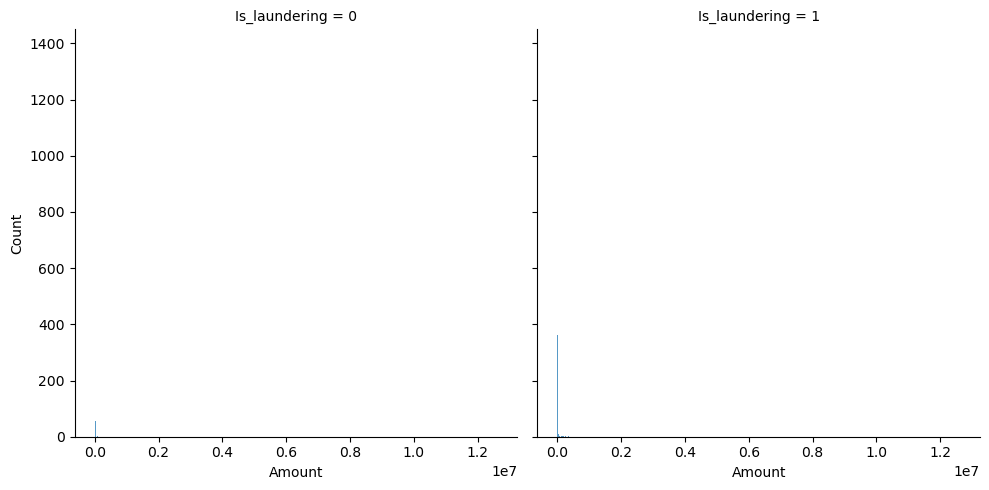

In [16]:
sns.displot(
    df_us, x="Amount", col="Is_laundering"
)